In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_score, recall_score
import pylab
import pprint

In [6]:
df = pd.DataFrame.from_csv('credit_dollars.csv')

In [8]:
df.head()

,credit,gender,education,martial_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_june,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,Y
1,627,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,21,0,0,0,0,1
2,3767,2,2,2,26,-1,2,0,0,0,...,102,108,102,0,31,31,31,0,62,1
3,2825,2,2,2,34,0,0,0,0,0,...,449,469,488,47,47,31,31,31,156,0
4,1569,2,2,1,37,0,0,0,0,0,...,888,909,927,62,63,37,34,33,31,0
5,1569,1,2,1,57,-1,0,-1,0,0,...,657,601,600,62,1151,313,282,21,21,0


In [189]:
df.columns

Index(['credit', 'gender', 'education', 'martial_status', 'age',
       'pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'bill_sep', 'bill_aug', 'bill_jul',
       'bill_june', 'bill_may', 'bill_apr', 'paid_sep', 'paid_aug', 'paid_jul',
       'paid_jun', 'paid_may', 'paid_apr', 'Y'],
      dtype='object')

In [176]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [235]:
df.columns[11]

'bill_sep'

In [15]:
pay_col = df.columns[5:11]

In [21]:
len(pay_col)

6

In [239]:
df.iloc[:,11:17].describe()

,bill_sep,bill_aug,bill_jul,bill_june,bill_may,bill_apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,1607.821567,1543.649333,1475.652500,1357.909167,1265.244433,1220.05100
std,2311.920342,2234.610658,2177.327461,2019.818737,1908.803657,1869.77099
min,-5198.000000,-2190.000000,-4937.000000,-5337.000000,-2553.000000,-10662.00000
25%,111.000000,93.000000,83.000000,73.000000,55.000000,39.00000
50%,702.000000,665.000000,630.000000,598.000000,568.000000,535.50000
75%,2106.000000,2009.000000,1888.250000,1711.000000,1575.250000,1544.00000
max,30282.000000,30892.000000,52247.000000,27993.000000,29110.000000,30193.00000


In [1]:
# Let's plot how many counts of each type of payment status for each month to get a sense of what proportion of people are paying their bills on time

In [60]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Payment Status April - September 2005')

In [61]:
for i in range(6):
    x,y = int(i/3), i%3
    
    ax[x,y].bar(df[pay_col[i]].value_counts().index, df[pay_col[i]].value_counts(), color='#00993e')
    ax[x,y].set_title(pay_col[i])
    ax[x,y].grid()

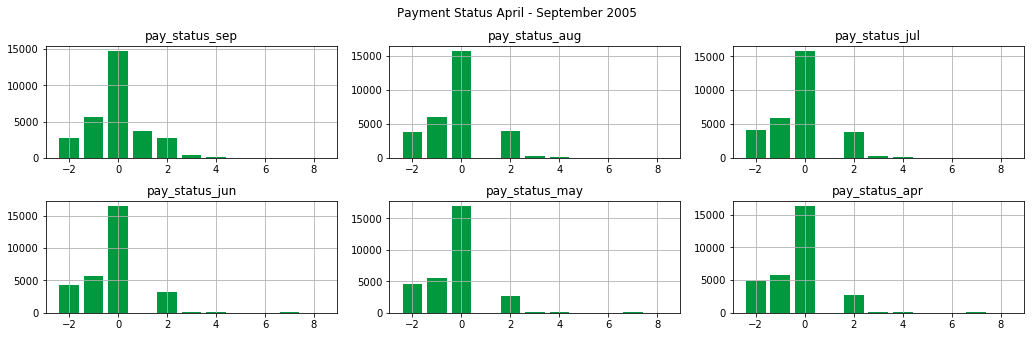

In [62]:
plt.tight_layout(pad=3, w_pad=1, h_pad=1)
plt.show()

In [136]:
pay_status_col = df.iloc[:,5:11]
status_col = pay_status_col.columns

pct_on_time = dict.fromkeys(['sep','aug','jul','jun','may','apr'])

print(status_col)
print(pct_on_time)

Index(['pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr'],
      dtype='object')
{'sep': None, 'aug': None, 'jul': None, 'jun': None, 'may': None, 'apr': None}


In [137]:
for i in range(len(status_col)):
    pct_on_time[list(pct_on_time.keys())[i]] = 100*round(pay_status_col.iloc[:,i].value_counts()[[-2,-1,0]].sum() / pay_status_col.iloc[:,i].value_counts().sum(),2)
    

In [138]:
pprint.pprint(pct_on_time)

# Looks like 86% of people on average over Apr-Sep pay early of on time.

{'apr': 90.0, 'aug': 85.0, 'jul': 86.0, 'jun': 88.0, 'may': 90.0, 'sep': 77.0}


In [3]:
# Below let's see the proportion of people that default on their credit card in the month of september compared to those that don't

In [4]:
# Not defaulting: 0
# Defaulting: 1

In [181]:
y.value_counts()

0    23364
1     6636
Name: Y, dtype: int64

In [292]:
plt.figure()
plt.bar([0,1],[23364,6636], color='#72a6f9', alpha=0.9)
plt.xticks(np.arange(0,2,1))
plt.title('Proportion of Defaulting')
plt.ylabel('Count', rotation=0, labelpad=30)
plt.xlabel('Status')
plt.grid(alpha=0.3)

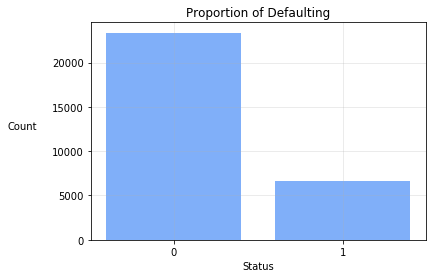

In [293]:
plt.show()

In [187]:
# find how many people defaulted in time range

total_default_pct = 6636 / (23364+6636) * 100
print('total default pct: ',total_default_pct,'%')

total default pct:  22.12 %


In [5]:
# Below we see that the number of men defaulting is fairly equal to that of women defaulting

In [230]:
genders_defaults = df.groupby(['gender','Y']).size()
print(genders_defaults)

gender  Y
1       0     9015
        1     2873
2       0    14349
        1     3763
dtype: int64


In [231]:
plt.figure()

In [232]:
genders_defaults.unstack(level=1).plot(kind='bar')

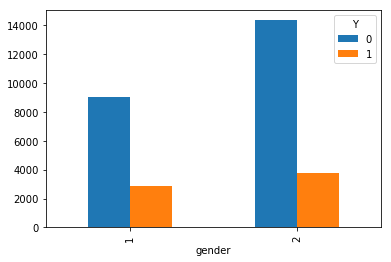

In [233]:
plt.show()